###### Nithin Sriram
Matrix Methods
FINAL PROJECT

### For my final project, I used four different algorithms to classify two different types of rays that enter the Earth's atmosphere. Every day, our planet is hit by small proton particles at extremely high speeds in the form of cosmic air showers that give off energy. Certain telescopes are able to observe and capture these different cosmic showers. The Telescope dataset I am using from Kaggle to classify these rays contains 19,020 rows of data, each continaing information about individual showers that have hit the Earth's atmosphere. The two types of showers are gamma rays and hardon showers. There are ten features in each row, including the length, width, size, speed, dispersion, and light emission of the rays. My goal is to use the features given in the dataset to classify between gamma rays and hadron showers. The four algorithms I use to classify this information is the Random Forest Classifier, K-Means Clustering Classfier, Support Vector Machines Classifier, and Neural Network Classifier with 3 hidden layers. I am hoping that one or many of these algorithms will achieve a high accuracy rate for classifying this binary dataset. For each of these algorithms, I have chosen a specific hyperparameter within the model that I vary using a for-loop. This allows me to run different versions of the model and examine whether it improves or worsens the classification accuracy.

### I start off by importing the necessary libraries to successfully complete the project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### By using the "head" function, I can display the first 5 rows of the dataset. This allows us to take a look at the different features used. The last column, "class" represents what type of cosmic ray that particular row represents. "g" means that is a gamma ray and "h" means it is a hadron shower. It just so happens that the first 5 records in the datset are gamma rays.

In [2]:
df = pd.read_csv("Telescope_Data.csv")
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Here, I am cleaning up the dataset and plotting the distribution of the two different types of rays. In this binary classification problem, it is evident that there are double the number of gamma rays than hadron showers. However this disparity shouldn't affect the results of the classification algorithms much because hadron showers still have a significant amount of rows to be used for training and testing.

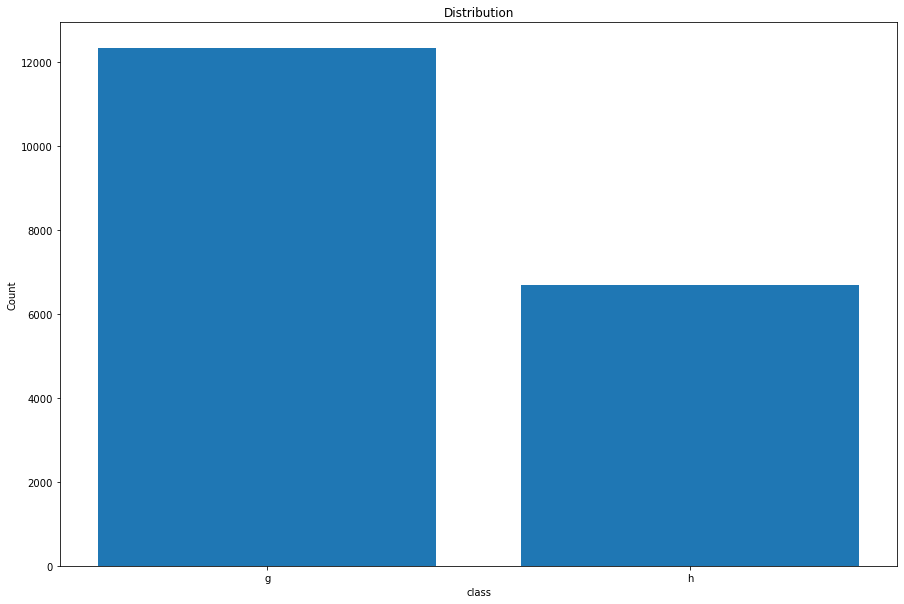

g = Gamma and h = Hadron
  class  Count
0     g  12332
1     h   6688


In [3]:
class_dist = pd.DataFrame(df['class'].value_counts()).reset_index()
class_dist = class_dist.rename(columns = {"index":"class", "class":"Count"})

plt.figure(figsize=(15,10))
plt.bar(class_dist['class'], class_dist['Count'])
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Distribution")
plt.show()
print('g = Gamma and h = Hadron')
print(class_dist)

### Before delving into the algorithms, I wanted to use a correlation heatmap so that we can visually see the relationship between the ten features being used in the dataset. Features with a correlation value closer to 1 are strongly positively correlated and features with a correlation value closer to -1 are strongly negatively correlated.  Features with a correlation value closer to 0 have a weak correlation with each other. It seems that size, length, and width of the cosmic rays are all positively correlated, which makes sense. It also appears that size and light emission are very strongly correlated. This is definitely something for us to take note of.

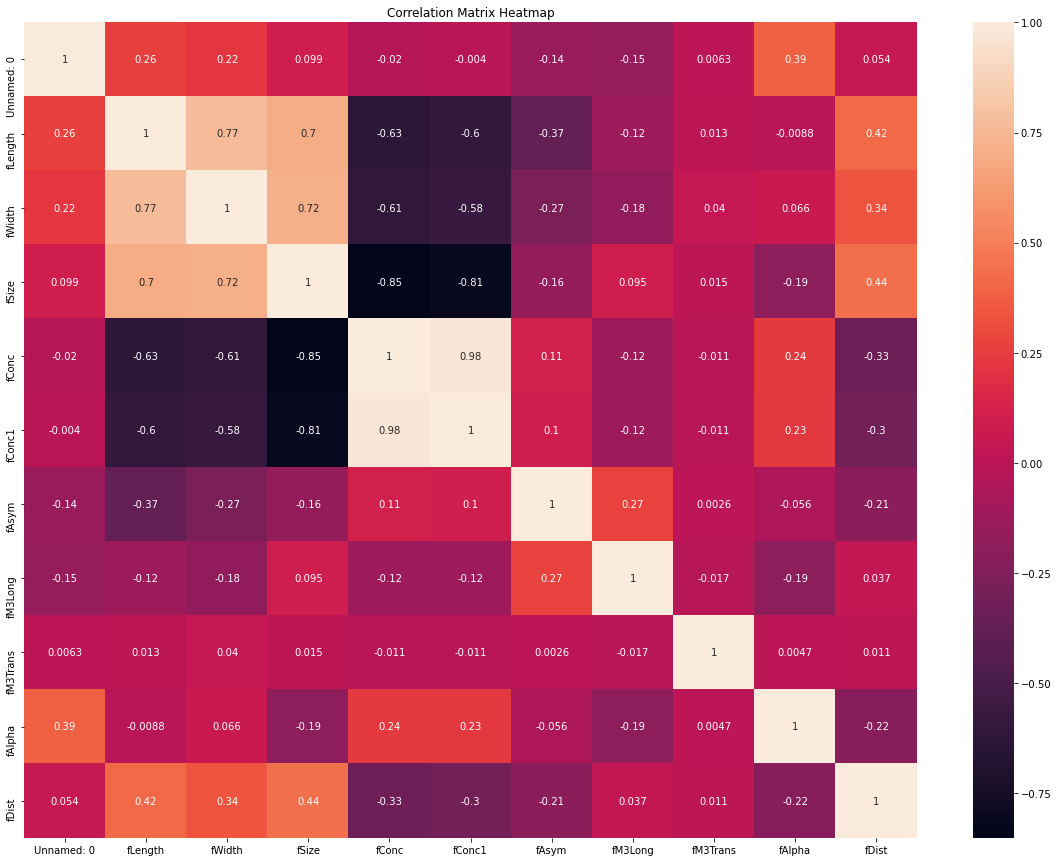

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Here is a scatterplot that also shows the relationship between each of the different features. The values from the heatmap above are numerically derived from analyzing the data from each mini-plot below.

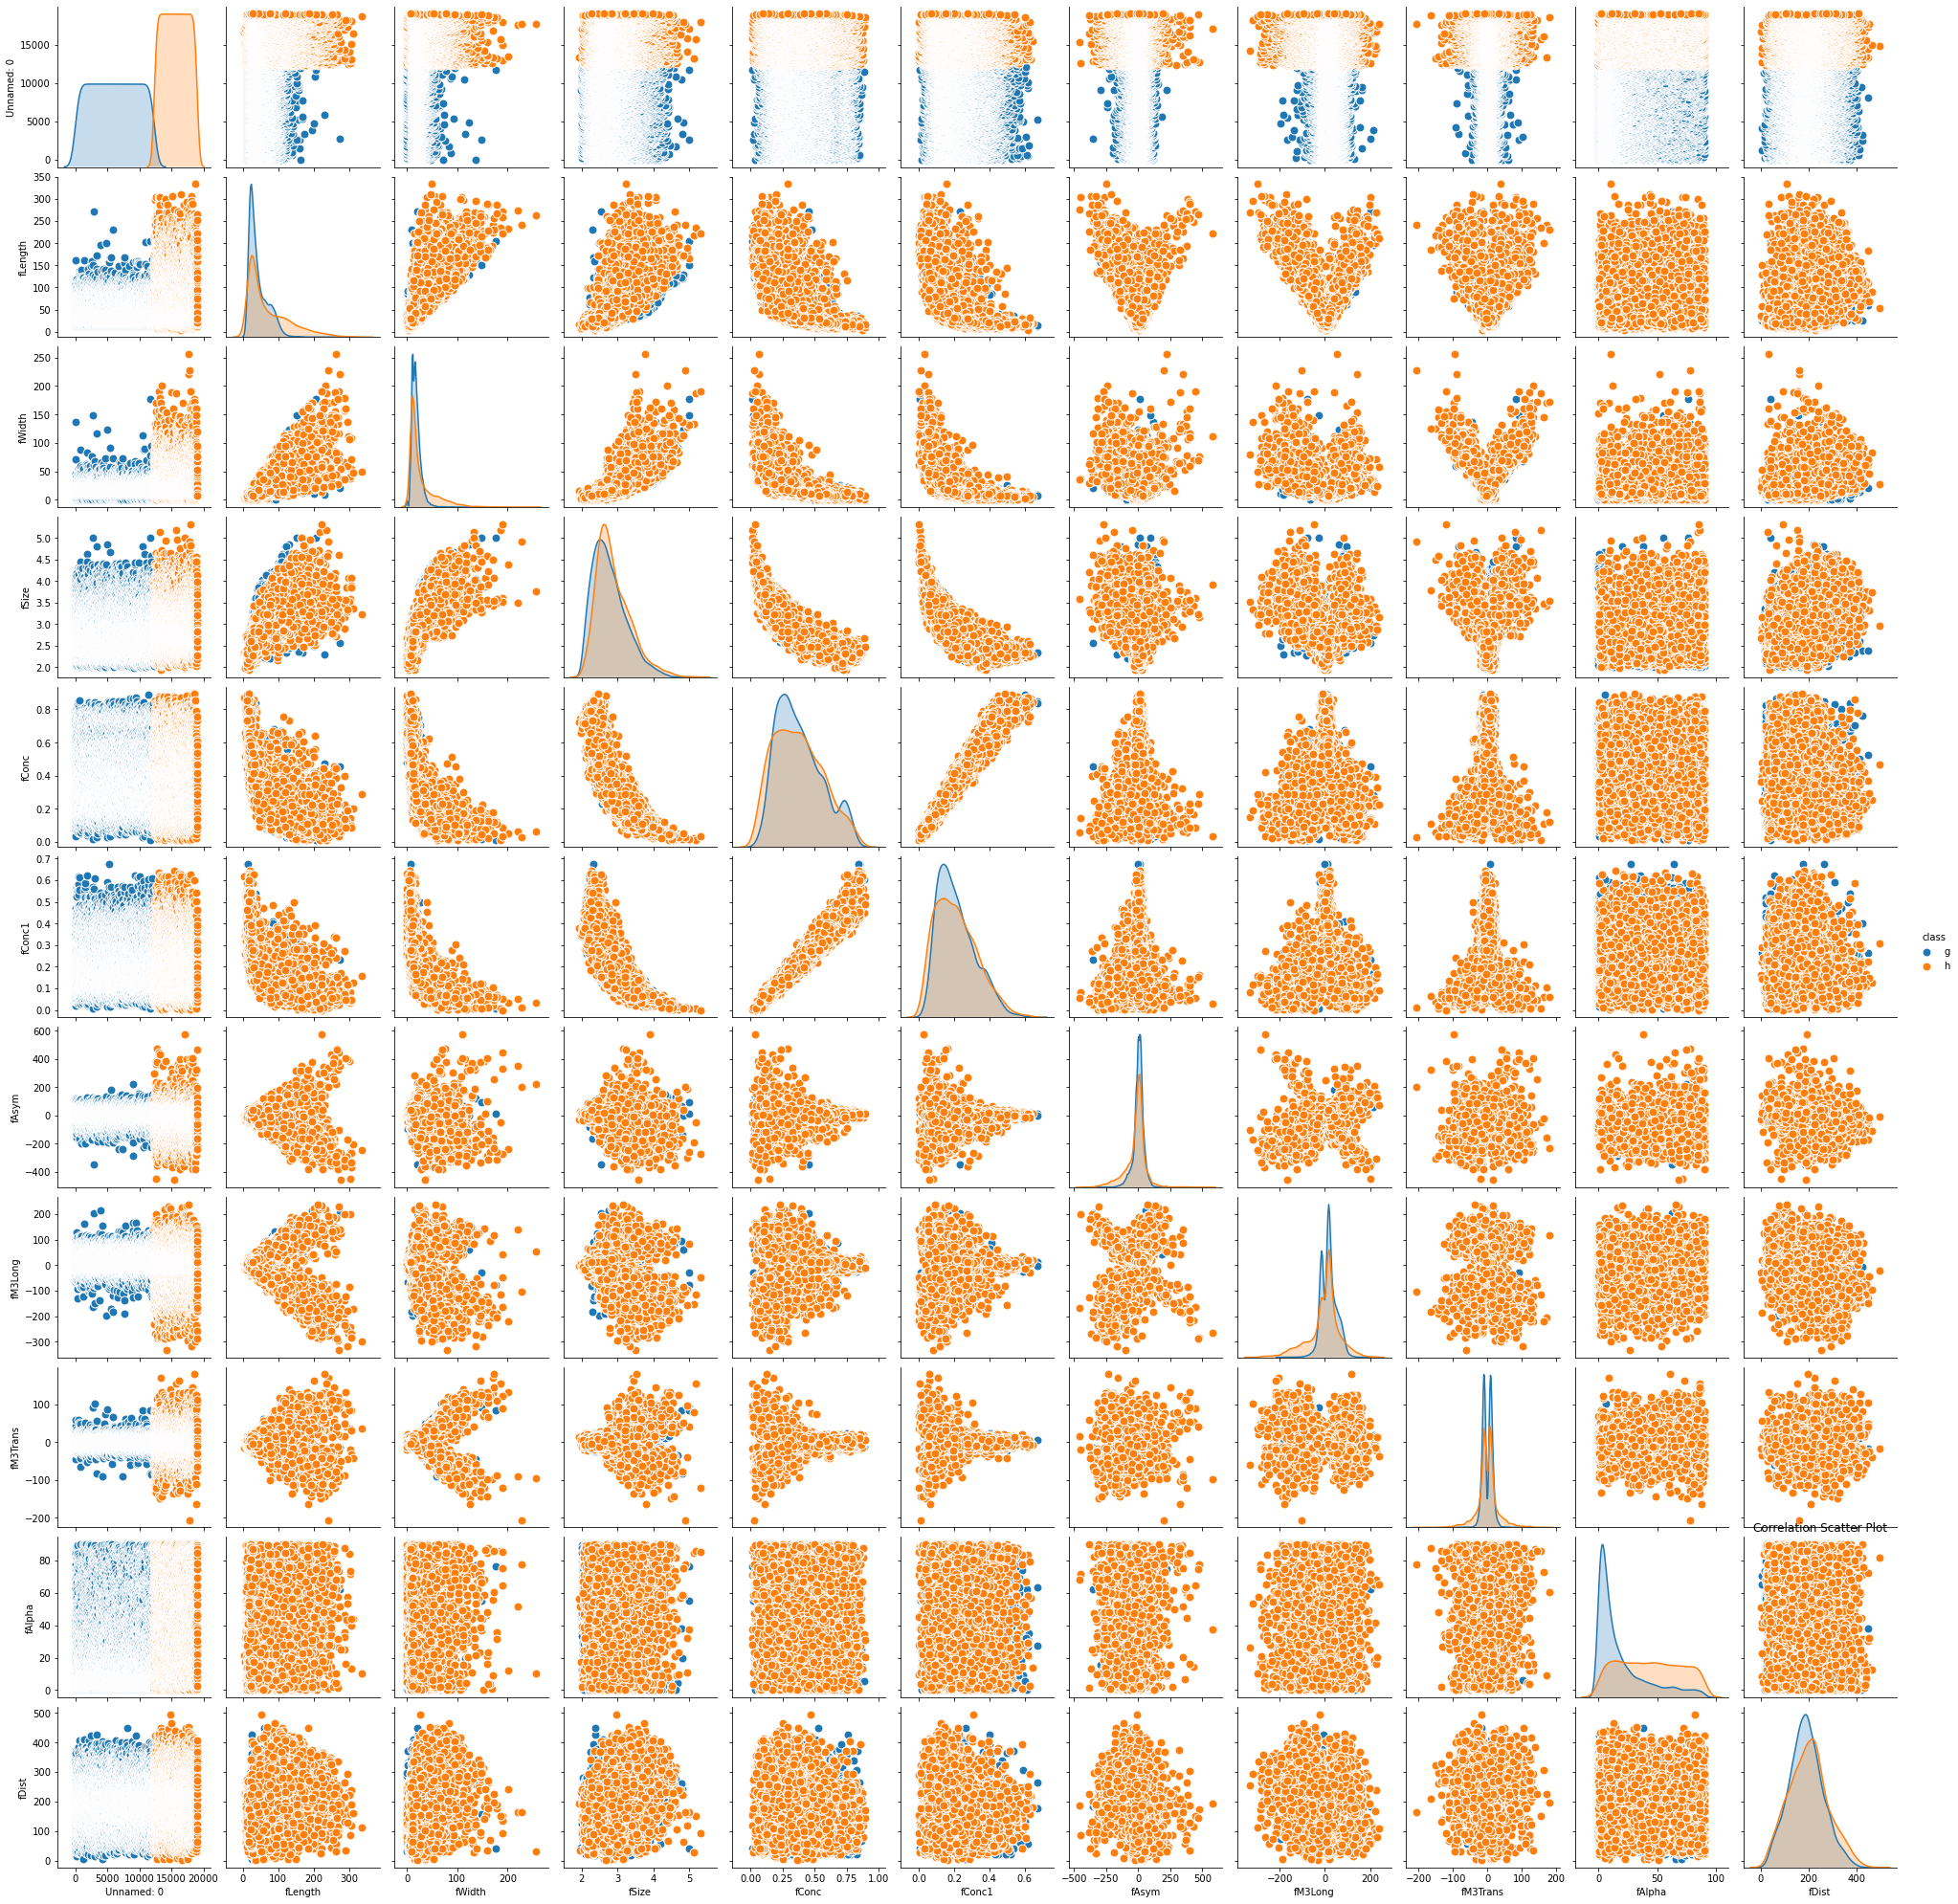

In [5]:
sns.pairplot(df, kind="scatter", hue="class", plot_kws=dict(s=80, edgecolor="white", linewidth=1.0))
plt.title("Correlation Scatter Plot")
plt.show()

### Now that we have looked at the dataset and understood each of the features, it is time to classify the data. I have chosen a test size of 20%. Because we have determined that there is a slight disparity between the number of gamma rays and number of hadron showers in the dataset, I am stratifying the training and testing samples to minimize the risk of error and misclassification.

In [6]:
y = df['class'].values
X = df.iloc[:, :-1].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(y_test)[0].value_counts()

0    2466
1    1338
Name: 0, dtype: int64

### The first algorithm I chose to use is the Random Forest Classifier. The strengths of this algorithm is that it reduces overfitting and it works well with classifying categorical variables Furthermore, it is extremely stable, so if a new data point is added to the dataset, the algorithm is not affected as much  due to the lack of overfitting and generalization of the model. Some of the disadvantages of this algorithm is that it takes a longer time to run than other models. The hyperparameter I wanted to alter for each run of the model is the number of n-estimators. This parameter determines the "number of trees in the forest". The higher the number of n-estimators, the better the performance of the algorithm because it takes the average of more decision trees. However, this does increase the time it takes to run. I used n-estimator values of 1000, 100, and 10 to see how the algorithm fares with a varying number of decision trees built.  Due to the advantages of this algorithm, I expect the classification accuracy to be fairly high.

### For each model I have implemented a confusion matrix and a classification report. This shows the number of correctly and incorrectly classified gamma rays and hadron showers. It also delves into the precision, accuracy, and weighted average of the classification accuracy rates. 

In [7]:
nestimatorslist = [1000, 100, 10]

for i in nestimatorslist:
    model_rf = RandomForestClassifier(n_estimators = i, random_state = 0)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    print(f'Accuracy of Random Forest Model {accuracy_score(y_test, y_pred_rf) * 100}%')
    
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    print(['g', 'h'])
    print(cm_rf)
    

    print(classification_report(y_test,y_pred_rf))
    print("\n")

Accuracy of Random Forest Model 100.0%
['g', 'h']
[[2466    0]
 [   0 1338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       1.00      1.00      1.00      1338

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



Accuracy of Random Forest Model 100.0%
['g', 'h']
[[2466    0]
 [   0 1338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       1.00      1.00      1.00      1338

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



Accuracy of Random Forest Model 100.0%
['g', 'h']
[[2466    0]
 [   0 1338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
  

### Surprisingly, it turns out that all three variations of the Random Forest Classifier are 100% accurate. This is very surprising especially for a dataset so large. Even with the n-estimator value as little as 10, this model classifies gamma rays and hadron showers without a single error. This is extremely impressive and has certainly surpassed my expectations. 

### The second algorithm I chose to implement is the K-means Clustering algorithm. Some of the advantages of this model is that it scales well to large datsets and adapts to new data points well. Some of the disadvantages of this model is that it struggles when the clusters are of different sizes and densities. This definitely applies to my dataset because the number of data points for hadron showers are half that of the number of data points for gamma rays. Furthermore, it does not handle large numbers of features well. This dataset includes 10 features so it shouldn't be too much of an issue, but we are certain that it would perform better if we removed a few features. I expect this model to perform okay, but definitely not as well as the Random Forest Classfier. The hyperparameter I am testing is the type of K-means algorithm implemented. K-means is a fairly broad model, so by choosing between auto, full, and elkan hyperparameters, there should be some slight differences in the accuracies. The classic K-means hyperparameter for "algorithm" is "full", which works well if the data points are sparse. If the data points are denser, the "elkan" option should work better. The "auto" option chooses a mixture of both depending on the model's analysis of the dataset. It should be interesting to see which option provides the highest accuracy.

In [8]:
kalgparameterlist = [ "auto", "full", "elkan"]

for i in kalgparameterlist:
    model_km = KMeans(n_clusters = 2, algorithm = i)
    model_km.fit(X_train, y_train)
    y_pred_km = model_km.predict(X_test)
    print(f'Accuracy of KMeans Clustering Model {accuracy_score(y_test, y_pred_km) * 100}%')

    cm_km = confusion_matrix(y_test, y_pred_km)
    print(['g', 'h'])
    print(cm_km)
    
    
    print(classification_report(y_test,y_pred_km))
    print("\n")

Accuracy of KMeans Clustering Model 55.33648790746582%
['g', 'h']
[[1504  962]
 [ 737  601]]
              precision    recall  f1-score   support

           0       0.67      0.61      0.64      2466
           1       0.38      0.45      0.41      1338

    accuracy                           0.55      3804
   macro avg       0.53      0.53      0.53      3804
weighted avg       0.57      0.55      0.56      3804



Accuracy of KMeans Clustering Model 45.241850683491066%
['g', 'h']
[[ 990 1476]
 [ 607  731]]
              precision    recall  f1-score   support

           0       0.62      0.40      0.49      2466
           1       0.33      0.55      0.41      1338

    accuracy                           0.45      3804
   macro avg       0.48      0.47      0.45      3804
weighted avg       0.52      0.45      0.46      3804



Accuracy of KMeans Clustering Model 44.82124079915878%
['g', 'h']
[[ 971 1495]
 [ 604  734]]
              precision    recall  f1-score   support

       

### After running each option multiple times, it seems as though the "elkan" option for the "algorithm" hyperparameter produces the highest accuracy rate. This tells us that the data points in this dataset are more dense together than they are sparse. The K-means clustering algorithm performed extremely poorly compared to the Random Forest model. A deeper look into the classification report shows that the precision for all three versions of this model were quite low, with a weighted average barely above 0.5. This makes sense because the disadvantages of this algorithm for this particular dataset are more significant than the disadvantages of the Random Forest Classifier.

### The third algorithm I chose to implement is Support Vector Machines. This model should perform well since the number of features in the dataset (10) is significantly less than the number of training samples (20% of 19020 = 3804). However, there are a few disadvantages with this algorithm. It is not suitable for large datasets, works better with more features, and performs poorly when there is a lot of noise within the data. I expect this model to have a higher accuracy than the K-means model, but less than the Random Forest Classifier. The hyperparameter I chose to experiment with for this algorithm is the type of kernel being used. The sigmoid kernel hyperparameter works well for logistic regression. The Radial Bias Function (RBF) kernel works well when the dataset is non-linear and there are a lot of features. The polynomial kernal hyperparameter works well when there is a smaller element of bias. I expect the "poly" option to have the highest accuracy rate for SVM. Let's see how each algorithm performs.

In [9]:
svmalgparameterlist = [ "sigmoid", "rbf", "poly"]

for i in svmalgparameterlist:
    model_svm = SVC(kernel = i)
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    print(f'Accuracy of SVM Model {accuracy_score(y_test, y_pred_svm) * 100}%')

    cm_svm = confusion_matrix(y_test, y_pred_svm)
    print(['g', 'h'])
    print(cm_svm)
    
    
    print(classification_report(y_test,y_pred_svm))
    print("\n")

Accuracy of SVM Model 85.67297581493165%
['g', 'h']
[[2203  263]
 [ 282 1056]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2466
           1       0.80      0.79      0.79      1338

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Accuracy of SVM Model 99.29022082018928%
['g', 'h']
[[2451   15]
 [  12 1326]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2466
           1       0.99      0.99      0.99      1338

    accuracy                           0.99      3804
   macro avg       0.99      0.99      0.99      3804
weighted avg       0.99      0.99      0.99      3804



Accuracy of SVM Model 98.08096740273396%
['g', 'h']
[[2454   12]
 [  61 1277]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2

### The SVM model had an extremely high accuracy rate with about 98% - significantly larger than that of the K-means Clustering model, which was expected. Looking at the classification report, it is evident that there is a noticeable difference between the sigmoid kernel hyperparameter compared to the RBF kernel and the poly kernel. This makes sense because this dataset doesn't need to be classfied by using logistic regression. Although the accuracy rate is still quite high, it doesn't compete with the Random Forest Classifier.

### The final algorithm that I chose to implement to classify the Telescope Data is Neural Networks with 3 hidden layers. I once again tested some different values for the hidden layer size hyperparameter. The reason why I chose the values within the hyperparamter list is because the hidden layer size supposedly provides the most accurate result when it matches the number of features used in the dataset. By including the value 10 and surrounding it with a value above and below I can put that theory to the test. One of the advantages of a neural network model is that it runs very quickly with large datasets, can fill in for missing data accurately, and is extremely accurate for binary classification problems. I expect this algorithm to perform better than all the past algorithms (other than Random Forest which was 100% accurate).

In [10]:
hiddenlayerlist = [9, 10, 11]
for i in hiddenlayerlist:
    model_mlp = MLPClassifier(hidden_layer_sizes=(i,i,i))
    model_mlp.fit(X_train,y_train)
    y_pred_mlp = model_mlp.predict(X_test)
    print(f'Accuracy of Neural Network Model {accuracy_score(y_test, y_pred_mlp) * 100}%')
    
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    print(['g', 'h'])
    print(cm_mlp)

    print(classification_report(y_test, y_pred_mlp))
    print("\n")

Accuracy of Neural Network Model 99.89484752891693%
['g', 'h']
[[2465    1]
 [   3 1335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       1.00      1.00      1.00      1338

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



Accuracy of Neural Network Model 99.9211356466877%
['g', 'h']
[[2465    1]
 [   2 1336]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       1.00      1.00      1.00      1338

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804



Accuracy of Neural Network Model 99.6845425867508%
['g', 'h']
[[2458    8]
 [   4 1334]]
              precision    recall  f1-score   support

           0       

### Here, we can see that this model performed extremely well with only a total of 4 misclassifications! Like I predicted, the algorithm performed best when the number of hidden layers equaled the number of features in the dataset, 10.

### Now that we have conducted our classification analysis, lets create a chart for us to visually see how each model fared. The bar chart below shows the number of correctly and incorrectly classified gamma rays and hadron showers. The green bars show how many rows were correctly classified and the red bars show how many data points were misclassified.

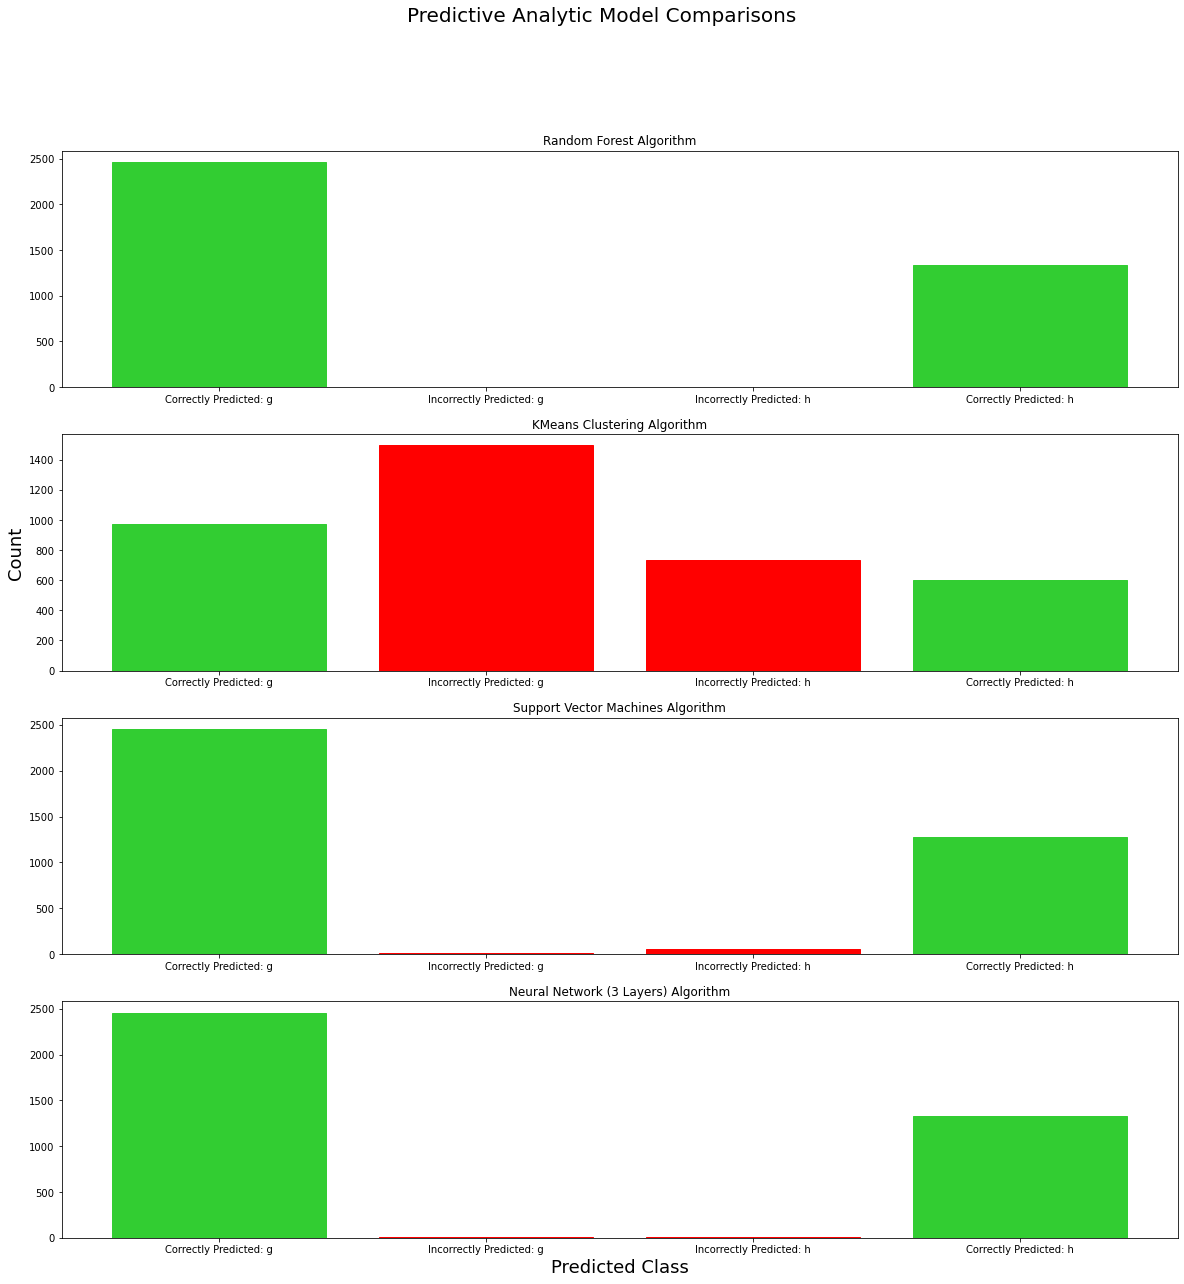

In [11]:
cm_km[1] = np.flip(cm_km[1])
cm_names = ['Correctly Predicted: g', 'Incorrectly Predicted: g', 'Incorrectly Predicted: h', 'Correctly Predicted: h']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20))
fig.suptitle('Predictive Analytic Model Comparisons', fontsize = 20)
ax2.set_ylabel('Count', fontsize=18)

barlist_km = ax1.bar(cm_names, cm_rf.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('r')
barlist_km[3].set_color('limegreen')

barlist_km = ax2.bar(cm_names, cm_km.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('r')
barlist_km[3].set_color('limegreen')

barlist_km = ax3.bar(cm_names, cm_svm.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('r')
barlist_km[3].set_color('limegreen')

barlist_km = ax4.bar(cm_names, cm_mlp.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('r')
barlist_km[3].set_color('limegreen')


ax1.title.set_text('Random Forest Algorithm')
ax2.title.set_text('KMeans Clustering Algorithm')
ax3.title.set_text('Support Vector Machines Algorithm')
ax4.title.set_text('Neural Network (3 Layers) Algorithm')

plt.xlabel('Predicted Class', fontsize=18)
plt.show()

### In conclusion, The Random Forest Algorithm performed the best with 100% accuracy, followed by the Nerual Networks with 99.89% accuracy followed by the Support Vector Machines with 99.29% accuracy, followed by the K-means Clustering Algorithm with 55.36% accuracy. I was not expecting the Random Forest model to be perfect, even after I ran it several times, but the accuracy rates of the rest of the models make sense due to their strengths and weaknesses in relation to this particular dataset. In the future, if I were to reclassify this dataset with more points, I would continue to use the Neural Networks model and Random Forest Algorithm. This was a wonderful project that allowed me to run four different algorithms and certain hyperparameters to accurately classify between gamma rays and hadron showers that hit the Earth's atmosphere.